In [1]:
import numpy as np
import pandas as pd
from functools import reduce
from math import floor, ceil
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.rcParams['figure.figsize'] = [10, 5]
import itertools
import timeit

number_of_samples = 9
samples = []
normalised_samples = []

for i in range(0,number_of_samples) :
    #Loading Data
    samples.append(pd.read_csv('sample'+str(i+1)+'.csv',index_col =0,  header = None, names = ['time', 'strain', 'resistence'], usecols = [0,1,2]))
    normalised_samples.append((samples[i]-samples[i].min())/(samples[i].max()-samples[i].min()))
    print('Openning ./sample'+str(i+1)+'.csv')
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].set_title('Sensor Data')
    axes[0].plot(list(samples[i].index),list(normalised_samples[i]['strain']),list(samples[i].index),list(normalised_samples[i]['resistence']))
    axes[0].set_xlabel('time - ()')
    axes[0].set_ylabel('Normalised Amplitude')
    axes[0].legend(['Strain','Resistence'])

    axes[1].set_title('Sensor Data in Feature Space')
    axes[1].scatter(list(samples[i]['strain']),list(samples[i]['resistence']), marker = '.')
    axes[1].set_xlabel('Strain')
    axes[1].set_ylabel('Resistence')
    plt.show()
    

Openning ./sample1.csv


Openning ./sample2.csv


Openning ./sample3.csv


Openning ./sample4.csv


Openning ./sample5.csv


Openning ./sample6.csv


Openning ./sample7.csv


Openning ./sample8.csv


Openning ./sample9.csv


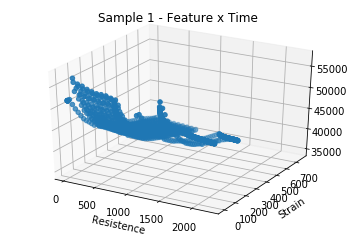

In [2]:
#Time Variance Visualization
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
#%matplotlib notebook

fig = plt.figure()
ax = fig.gca(projection='3d')
cset = ax.scatter(list(samples[0].index),list(samples[0]['strain']), list(samples[0]['resistence']), cmap=cm.coolwarm)
ax.set_title('Sample 1 - Feature x Time')
ax.set_xlabel('Time')
ax.set_ylabel('Strain')
ax.set_xlabel('Resistence')
plt.show()

Total data size: 2199. Train data size: 1759. Test data size: 440.
Coefficients: 
 [[-2.905753   -0.45586189  0.33548495 -0.18628474  0.04818396 -0.02051602
   0.03054224 -0.37944032  0.0045958  -0.14864026  2.22874057]]
Mean squared error: 0.01
R2 score: 0.95


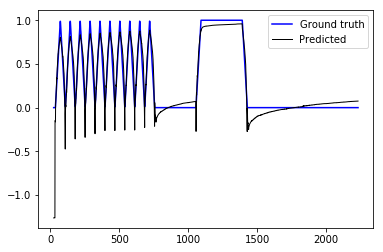

Total data size: 3041. Train data size: 2432. Test data size: 609.
Coefficients: 
 [[-1.05537127 -0.14098328 -0.04062375 -0.00837268  0.38867178 -0.03055022
  -1.03966812  0.49429619 -0.12048601 -0.40031471  0.57333051]]
Mean squared error: 0.12
R2 score: 0.10


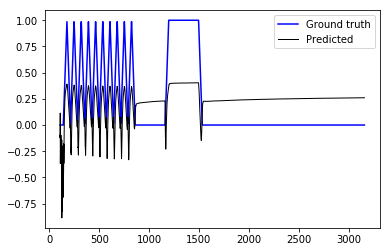

Total data size: 1752. Train data size: 1401. Test data size: 351.
Coefficients: 
 [[-2.13953891 -1.66597681  1.43407232 -0.07684632 -0.14910015  0.15795712
  -0.79483068  0.55363952 -0.07395649 -0.1522133   1.66186094]]
Mean squared error: 0.01
R2 score: 0.96


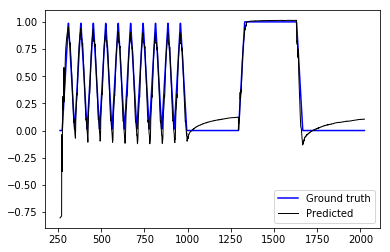

Total data size: 1955. Train data size: 1564. Test data size: 391.
Coefficients: 
 [[  2.42916596   1.94506823  -0.86073297  -4.14289128  11.25073167
  -14.02409386   6.36181715   0.658789    -0.68652955   1.44625238
   -3.2469215 ]]
Mean squared error: 0.03
R2 score: 0.81


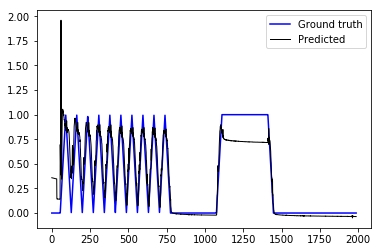

Total data size: 284. Train data size: 227. Test data size: 57.
Coefficients: 
 [[ 0.02728793 -0.00090882  0.09916571  0.10184382 -0.00966886 -0.02359785
   0.06924478 -0.00248925  0.08485442  0.08506961 -0.13790826]]
Mean squared error: 0.08
R2 score: 0.05


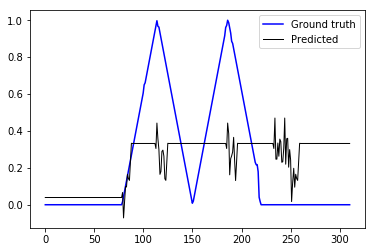

Total data size: 1816. Train data size: 1452. Test data size: 364.
Coefficients: 
 [[-0.69435313 -0.42976819 -0.10876764 -0.04286663  0.13647302 -0.05328834
  -0.27082033  0.19049742  0.00936369 -0.13187491 -0.0427981 ]]
Mean squared error: 0.02
R2 score: 0.89


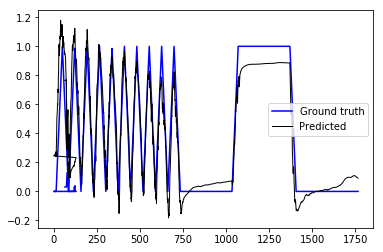

Total data size: 1931. Train data size: 1544. Test data size: 387.
Coefficients: 
 [[-0.78697775 -1.3000633   1.0241743  -0.79292182  0.73251957  0.0218639
  -0.24493906 -0.17717472  0.24163677 -0.38374641  0.36768834]]
Mean squared error: 0.04
R2 score: 0.76


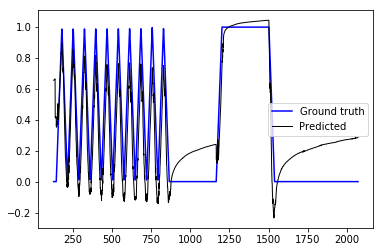

Total data size: 1686. Train data size: 1348. Test data size: 338.
Coefficients: 
 [[-0.5352982  -0.43238259 -0.07320552 -0.05581166  0.0038045  -0.27402668
   0.17893312 -0.06034363 -0.12989241 -0.21133652 -0.04981921]]
Mean squared error: 0.02
R2 score: 0.90


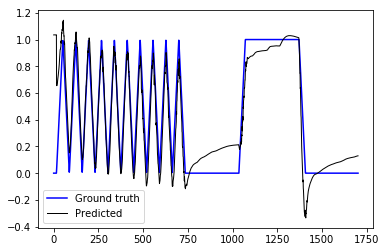

Total data size: 1696. Train data size: 1356. Test data size: 340.
Coefficients: 
 [[-0.96584552 -0.54720379 -0.58557826  0.47257529  0.09846486 -0.07448758
   0.70968107 -0.12275904 -0.0092266   0.05995848 -0.44158501]]
Mean squared error: 0.09
R2 score: 0.44


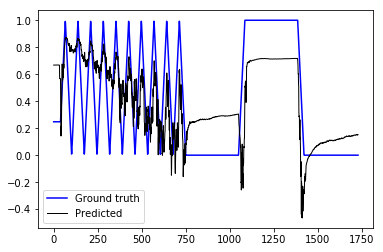

In [3]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

for sample in normalised_samples:
    markov_order = 10
    column_names = tuple('resistence[t-'+str(i)+']' for i in range(1,markov_order+1))
    for name in column_names:
        sample[name] = ''

    for i in range(0,len(sample['resistence'])):
        buffer = list(sample['resistence'].iloc[i-markov_order:i])
        if len(buffer) < markov_order:
            buffer = np.zeros(markov_order)    
        for j in range(0,markov_order):
            sample[column_names[j]].iat[i] = buffer[j]


    #Filtering Suggestions
    s = sample[sample.strain >= 0] #filter using strain??
    s = s.iloc[markov_order:]
    s = s.sample(frac=1)

    #fig, ax = plt.subplots()
    #ax.scatter(list(s['strain']),list(s['resistence']), marker = '.')
    #ax.set_title('Sample 1 in Feature Space')
    #ax.set_xlabel('Strain')
    #ax.set_ylabel('Resistence')
    #plt.show()

    #Splitting train and test dataset
    train_size = floor(0.8*s.shape[0])
    train_data = s.iloc[0:train_size]
    test_data = s.iloc[train_size:]
    print('Total data size: ',s.shape[0],'. Train data size: ', train_data.shape[0],
          '. Test data size: ', test_data.shape[0], '.',sep='')

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(train_data[['resistence']+list(column_names)].as_matrix(),
             train_data['strain'].as_matrix().reshape(-1, 1))

    # Make predictions using the testing set
    strain_pred = regr.predict(test_data[['resistence']+list(column_names)].as_matrix())

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(test_data['strain'].as_matrix(), strain_pred))
    # Explained variance score: 1 is perfect prediction
    print('R2 score: %.2f' % r2_score(test_data['strain'].as_matrix(), strain_pred))
    #fig, ax = plt.subplots()
    # Plot outputs
    #ax.scatter(list(test_data['resistence']), test_data['strain'].as_matrix(),  color='blue')
    #ax.plot(list(test_data['resistence']), strain_pred, color='black', linewidth=3)
    #plt.show()
    fig, ax = plt.subplots()
    # Plot outputs
    ax.plot(sample.index, list(sample['strain']),  color='blue')
    ax.plot(sample.index, regr.predict(sample[['resistence']+list(column_names)].as_matrix()), color='black', linewidth=1)
    ax.legend(['Ground truth', 'Predicted'])
    plt.show()

Total data size: 2199. Train data size: 1759. Test data size: 440.


/home/attyla/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error: 0.00
R2 score: 0.98


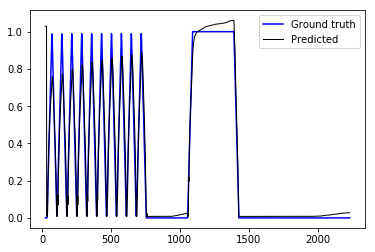

Total data size: 3041. Train data size: 2432. Test data size: 609.
Mean squared error: 0.11
R2 score: 0.10


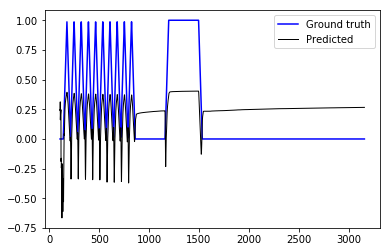

Total data size: 1752. Train data size: 1401. Test data size: 351.
Mean squared error: 0.01
R2 score: 0.96


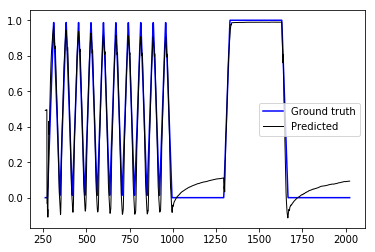

Total data size: 1955. Train data size: 1564. Test data size: 391.
Mean squared error: 0.03
R2 score: 0.82


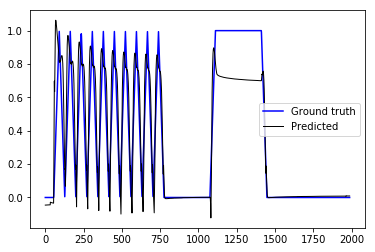

Total data size: 284. Train data size: 227. Test data size: 57.
Mean squared error: 0.17
R2 score: -0.39


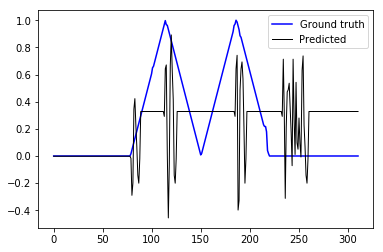

Total data size: 1816. Train data size: 1452. Test data size: 364.
Mean squared error: 0.02
R2 score: 0.90


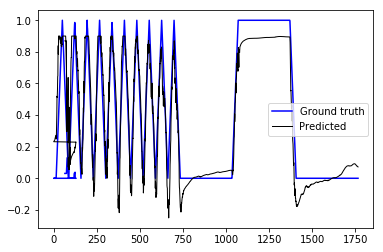

Total data size: 1931. Train data size: 1544. Test data size: 387.
Mean squared error: 0.01
R2 score: 0.93


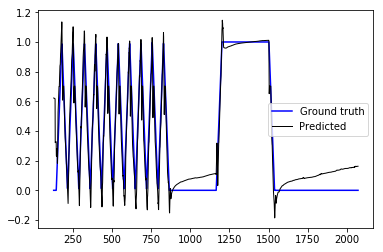

Total data size: 1686. Train data size: 1348. Test data size: 338.
Mean squared error: 0.01
R2 score: 0.91


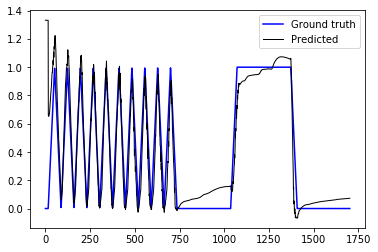

Total data size: 1696. Train data size: 1356. Test data size: 340.
Mean squared error: 0.07
R2 score: 0.59


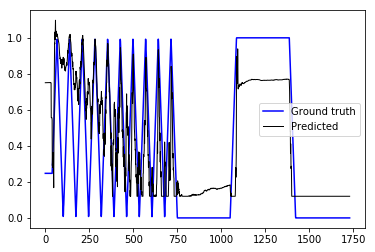

In [4]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

for sample in normalised_samples:
    markov_order = 10
    column_names = tuple('resistence[t-'+str(i)+']' for i in range(1,markov_order+1))
    for name in column_names:
        sample[name] = ''

    for i in range(0,len(sample['resistence'])):
        buffer = list(sample['resistence'].iloc[i-markov_order:i])
        if len(buffer) < markov_order:
            buffer = np.zeros(markov_order)    
        for j in range(0,markov_order):
            sample[column_names[j]].iat[i] = buffer[j]


    #Filtering Suggestions
    s = sample[sample.strain >= 0] #filter using strain??
    s = s.iloc[markov_order:]
    s = s.sample(frac=1)

    #fig, ax = plt.subplots()
    #ax.scatter(list(s['strain']),list(s['resistence']), marker = '.')
    #ax.set_title('Sample 1 in Feature Space')
    #ax.set_xlabel('Strain')
    #ax.set_ylabel('Resistence')
    #plt.show()

    #Splitting train and test dataset
    train_size = floor(0.8*s.shape[0])
    train_data = s.iloc[0:train_size]
    test_data = s.iloc[train_size:]
    print('Total data size: ',s.shape[0],'. Train data size: ', train_data.shape[0],
          '. Test data size: ', test_data.shape[0], '.',sep='')

    # Create MLP object
    regr = MLPRegressor(hidden_layer_sizes=(5,),
                           activation='relu',
                           solver='adam',
                           learning_rate='adaptive',
                           max_iter=1000,
                           learning_rate_init=0.01,
                           alpha=0.01)

    # Train the model using the training sets
    regr.fit(train_data[['resistence']+list(column_names)].as_matrix(),
             train_data['strain'].as_matrix().reshape(-1, 1))

    # Make predictions using the testing set
    strain_pred = regr.predict(test_data[['resistence']+list(column_names)].as_matrix())

    # The coefficients
    #print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(test_data['strain'].as_matrix(), strain_pred))
    # Explained variance score: 1 is perfect prediction
    print('R2 score: %.2f' % r2_score(test_data['strain'].as_matrix(), strain_pred))
    #fig, ax = plt.subplots()
    # Plot outputs
    #ax.scatter(list(test_data['resistence']), test_data['strain'].as_matrix(),  color='blue')
    #ax.plot(list(test_data['resistence']), strain_pred, color='black', linewidth=3)
    #plt.show()
    
    fig, ax = plt.subplots()
    # Plot outputs
    ax.plot(sample.index, list(sample['strain']),  color='blue')
    ax.plot(sample.index, regr.predict(sample[['resistence']+list(column_names)].as_matrix()), color='black', linewidth=1)
    ax.legend(['Ground truth', 'Predicted'])
    plt.show()

In [5]:
from sklearn.externals import joblib
sample = samples[0]
markov_order = 10
column_names = tuple('resistence[t-'+str(i)+']' for i in range(1,markov_order+1))
for name in column_names:
    sample[name] = ''

for i in range(0,len(sample['resistence'])):
    buffer = list(sample['resistence'].iloc[i-markov_order:i])
    if len(buffer) < markov_order:
        buffer = np.zeros(markov_order)    
    for j in range(0,markov_order):
        sample[column_names[j]].iat[i] = buffer[j]


#Filtering Suggestions
s = sample[sample.strain >= 0] #filter using strain??
s = s.iloc[markov_order:]
s = s.sample(frac=1)

#Splitting train and test dataset
train_size = floor(1*s.shape[0])
train_data = s.iloc[0:train_size]
test_data = s.iloc[train_size:]
print('Total data size: ',s.shape[0],'. Train data size: ', train_data.shape[0],
      '. Test data size: ', test_data.shape[0], '.',sep='')

# Create MLP object
regr = MLPRegressor(hidden_layer_sizes=(5,),
                       activation='relu',
                       solver='adam',
                       learning_rate='adaptive',
                       max_iter=1000,
                       learning_rate_init=0.01,
                       alpha=0.01)

# Train the model using the training sets
regr.fit(train_data[['resistence']+list(column_names)].as_matrix(),
         train_data['strain'].as_matrix().reshape(-1, 1))

joblib.dump(regr, 'neural_networks_model.pkl') 

Total data size: 2199. Train data size: 2199. Test data size: 0.


/home/attyla/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['neural_networks_model.pkl']